

```
## **Data-Driven Retail: From Chaos to Clarity**
```



Raw Data to Preprocesed Datta

In [2]:
# 📦 STEP 1: SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

sns.set(style='whitegrid')

# Upload raw_data.csv
uploaded = files.upload()
for f in uploaded:
    df = pd.read_csv(f)
    print(f"✅ File '{f}' loaded.")
    break
# 🔎 PREVIEW THE FIRST 5 ROWS
df.head()

Saving Week4Dataset - Sheet1.csv to Week4Dataset - Sheet1.csv
✅ File 'Week4Dataset - Sheet1.csv' loaded.


,Date,Customer_ID,Age,Gender,Income,Spending_Score,Credit_Score,Loan_Amount,Previous_Defaults,Marketing_Spend,Purchase_Frequency,Seasonality,Sales,Customer_Churn,Defaulted
0,12/04/2024,1,56,Female,142418.0,7,391.0,8083,1,15376,3,Low,32526,0,0
1,21/02/2024,2,69,Male,63088.0,82,652.0,34328,2,6889,6,Low,78493,0,0
2,02/04/2024,3,46,Male,136868.0,91,662.0,47891,2,6054,29,Medium,57198,1,0
3,15/01/2024,4,32,Female,85375.5,34,644.0,25103,2,4868,8,Medium,48395,0,0
4,16/04/2024,5,60,Male,59811.0,91,469.0,44891,1,17585,12,High,29031,1,0


Statistical Analysis with Null Value Check

In [5]:
for col in df.columns:
    print(f"\n📊 Statistics for: {col}")
    if pd.api.types.is_numeric_dtype(df[col]):
        print("Mean:", df[col].mean())
        print("Median:", df[col].median())
        print("Standard Deviation:", df[col].std())
        print("Min:", df[col].min())
        print("Max:", df[col].max())
    else:
        print("⚠️ Skipped — not numeric")



📊 Statistics for: Date
⚠️ Skipped — not numeric

📊 Statistics for: Customer_ID
Mean: 250.5
Median: 250.5
Standard Deviation: 144.4818327679989
Min: 1
Max: 500

📊 Statistics for: Age
Mean: 44.22
Median: 45.0
Standard Deviation: 15.036082187028311
Min: 18
Max: 69

📊 Statistics for: Gender
⚠️ Skipped — not numeric

📊 Statistics for: Income
Mean: 84495.8
Median: 85375.5
Standard Deviation: 38050.53054769303
Min: 20055.0
Max: 149922.0

📊 Statistics for: Spending_Score
Mean: 50.862
Median: 51.0
Standard Deviation: 29.125100840992733
Min: 1
Max: 99

📊 Statistics for: Credit_Score
Mean: 574.92
Median: 588.5
Standard Deviation: 149.37168540523885
Min: 300.0
Max: 848.0

📊 Statistics for: Loan_Amount
Mean: 28592.936
Median: 29817.0
Standard Deviation: 11795.327888273721
Min: 5163
Max: 49936

📊 Statistics for: Previous_Defaults
Mean: 0.974
Median: 1.0
Standard Deviation: 0.8262501913812268
Min: 0
Max: 2

📊 Statistics for: Marketing_Spend
Mean: 10558.128
Median: 10754.0
Standard Deviation: 5508.21

Update Null Values

In [ ]:
df['Date'] = df['Date'].fillna(df['Date'].mode()[0])
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Credit_Score'] = df['Credit_Score'].fillna(df['Credit_Score'].mean())
df['Loan_Amount'] = df['Loan_Amount'].fillna(df['Loan_Amount'].mode()[0])
# Check again to make sure there are no missing values
df.isnull().sum()


,0
Date,0
Customer_ID,0
Age,0
Gender,0
Income,0
Spending_Score,0
Credit_Score,0
Loan_Amount,0
Previous_Defaults,0
Marketing_Spend,0


Saving the Cleaned Dataset

In [6]:
from google.colab import files
# Save your cleaned DataFrame to a CSV file
df.to_csv('cleaned_dataset.csv', index=False)
files.download('cleaned_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Finding the Outliers and update with Statistical Values

In [ ]:
import pandas as pd
import numpy as np

# Load the CSV
#df = pd.read_csv('cleaned_dataset.csv')

# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=np.number).columns

# Loop through each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create boolean mask for outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        print(f"\n📌 Outliers detected in column: **{col}**")
        print(outliers[[col]])
    else:
        print(f"\n✅ No outliers found in column: **{col}**")



✅ No outliers found in column: **Customer_ID**

✅ No outliers found in column: **Age**

✅ No outliers found in column: **Income**

✅ No outliers found in column: **Spending_Score**

✅ No outliers found in column: **Credit_Score**

✅ No outliers found in column: **Loan_Amount**

✅ No outliers found in column: **Previous_Defaults**

✅ No outliers found in column: **Marketing_Spend**

✅ No outliers found in column: **Purchase_Frequency**

✅ No outliers found in column: **Sales**

✅ No outliers found in column: **Customer_Churn**

📌 Outliers detected in column: **Defaulted**
     Defaulted
6            1
9            1
11           1
12           1
16           1
..         ...
486          1
490          1
491          1
492          1
497          1

[95 rows x 1 columns]


Spending Score Vs Seasonality

/tmp/ipython-input-8-4140108761.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seasonality', y='Spending_Score', data=df, palette='Set2')


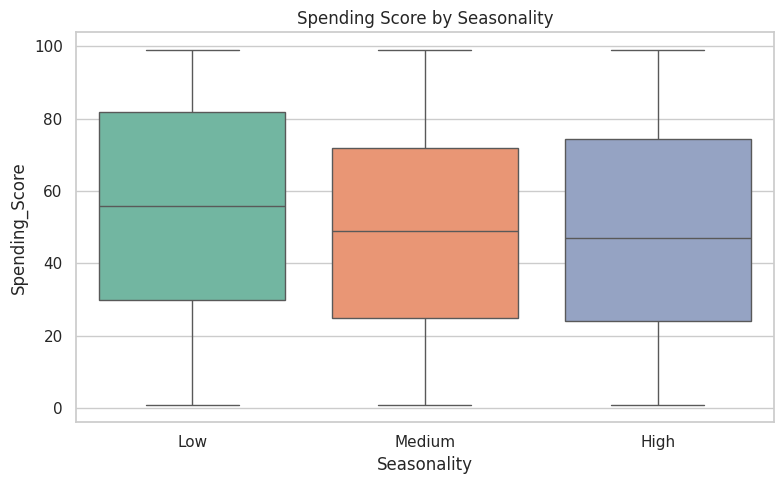

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("cleaned_dataset.csv")

plt.figure(figsize=(8,5))
sns.boxplot(x='Seasonality', y='Spending_Score', data=df, palette='Set2')
plt.title('Spending Score by Seasonality')
plt.tight_layout()
plt.show()


Checking Date Column Before Sales Trend Analysis

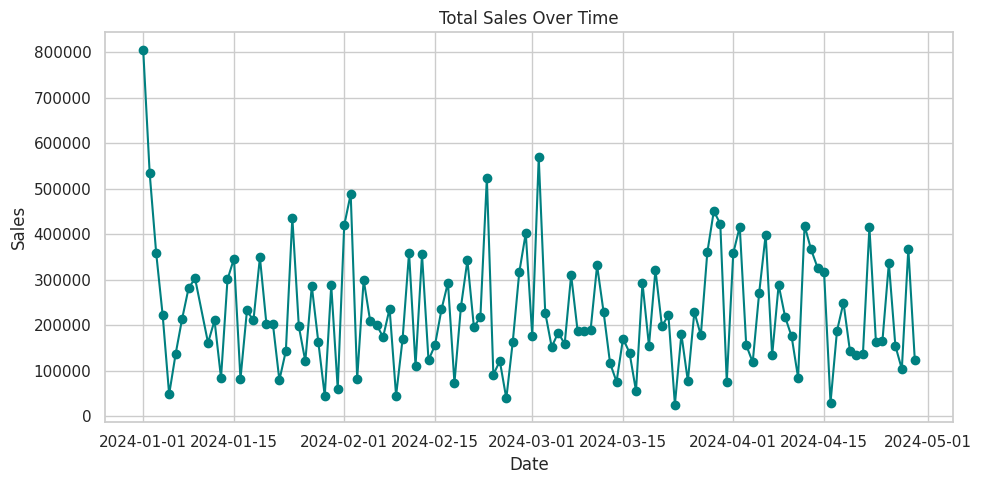

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df_grouped = df.groupby('Date')['Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_grouped['Date'], df_grouped['Sales'], marker='o', color='teal')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


Creating Age Groups

/tmp/ipython-input-7-2239591916.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df[df['Customer_Churn']==1].groupby('Age_Group').size()


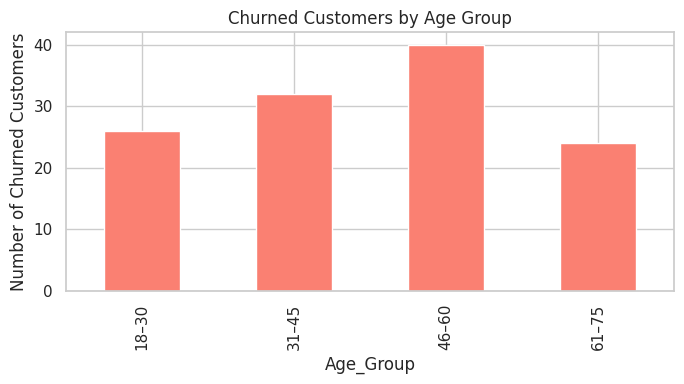

In [ ]:
df['Age_Group'] = pd.cut(df['Age'], bins=[18,30,45,60,75], labels=['18–30','31–45','46–60','61–75'])

churn_counts = df[df['Customer_Churn']==1].groupby('Age_Group').size()

churn_counts.plot(kind='bar', color='salmon', figsize=(7,4), title='Churned Customers by Age Group')
plt.ylabel('Number of Churned Customers')
plt.tight_layout()
plt.show()


Scatter Pot for Loan Amount for Credit Score

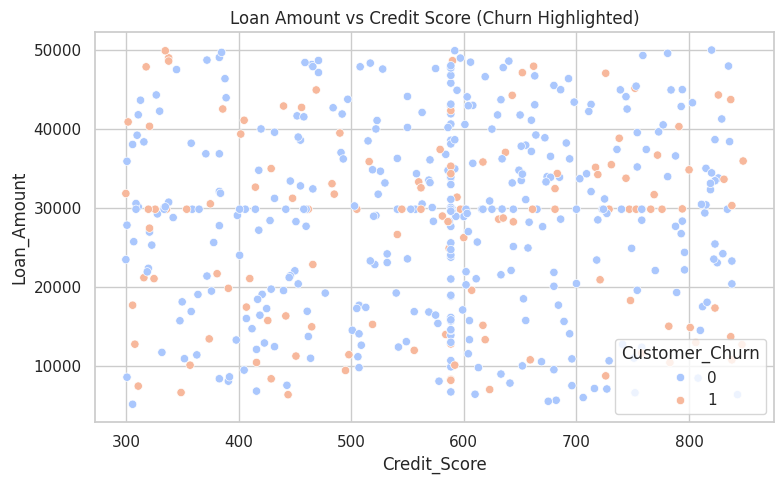

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Credit_Score', y='Loan_Amount', hue='Customer_Churn', data=df, palette='coolwarm')
plt.title('Loan Amount vs Credit Score (Churn Highlighted)')
plt.tight_layout()
plt.show()


Seasonality Vs Credit Score

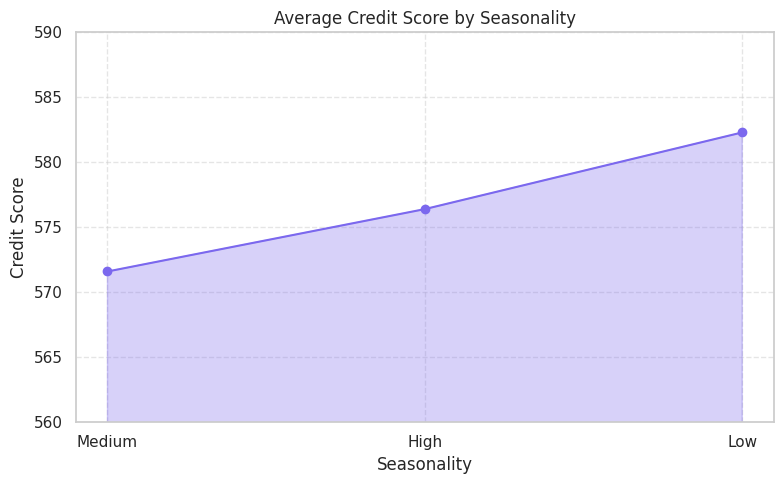

In [ ]:
import matplotlib.pyplot as plt

# Actual values from your dataset
seasonality = ['Medium', 'High', 'Low']
credit_scores = [571.6, 576.4, 582.3]

plt.figure(figsize=(8, 5))
plt.plot(seasonality, credit_scores, marker='o', linestyle='-', color='mediumslateblue')
plt.fill_between(seasonality, credit_scores, color='mediumslateblue', alpha=0.3)



plt.title('Average Credit Score by Seasonality')
plt.xlabel('Seasonality')
plt.ylabel('Credit Score')
plt.ylim(560, 590)  # Adjusted to fit your range
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Credit Score Vs Seasonality

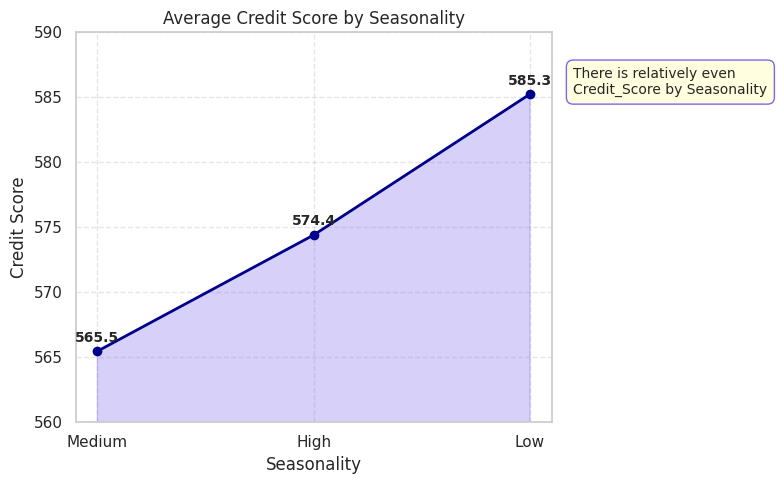

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cleaned_dataset.csv")

# Group by Seasonality and calculate average Credit Score
avg_credit = df.groupby('Seasonality')['Credit_Score'].mean().reindex(['Medium', 'High', 'Low'])

# Prepare data
x = avg_credit.index
y = avg_credit.values

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', color='darkblue', linewidth=2)
plt.fill_between(x, y, color='mediumslateblue', alpha=0.3)

# Add data labels
for i, value in enumerate(y):
    plt.text(x[i], value + 0.5, f"{value:.1f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add annotation box
plt.text(2.2, max(y), "There is relatively even\nCredit_Score by Seasonality",
         bbox=dict(facecolor='lightyellow', edgecolor='mediumslateblue', boxstyle='round,pad=0.5'),
         fontsize=10)

# Styling
plt.title('Average Credit Score by Seasonality')
plt.xlabel('Seasonality')
plt.ylabel('Credit Score')
plt.ylim(560, 590)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Average Loan Amount By seasonality

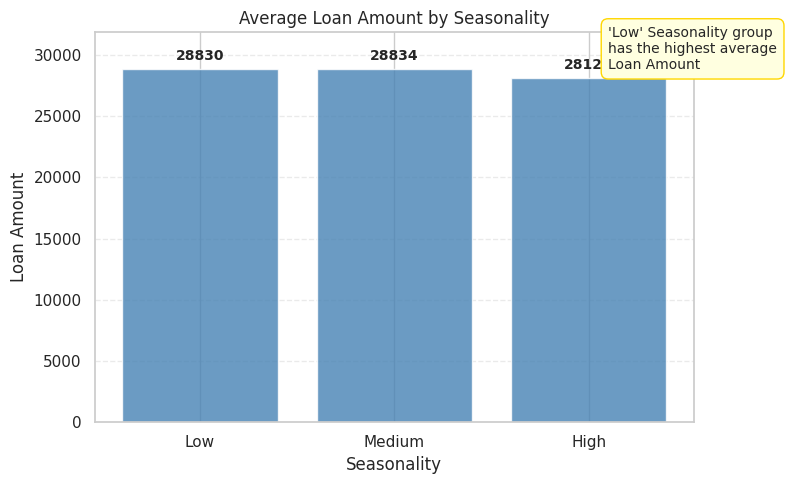

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("cleaned_dataset.csv")

# Group by Seasonality and calculate average Loan Amount
avg_loan = df.groupby('Seasonality')['Loan_Amount'].mean().reindex(['Low', 'Medium', 'High'])

# Prepare data
x = avg_loan.index
y = avg_loan.values

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(x, y, color='steelblue', alpha=0.8)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, f"{height:.0f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add annotation box
plt.text(2.1, max(y), "'Low' Seasonality group\nhas the highest average\nLoan Amount",
         bbox=dict(facecolor='lightyellow', edgecolor='gold', boxstyle='round,pad=0.5'),
         fontsize=10)

# Styling
plt.title('Average Loan Amount by Seasonality')
plt.xlabel('Seasonality')
plt.ylabel('Loan Amount')
plt.ylim(0, max(y) + 3000)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Average Spending Score By Seasonality

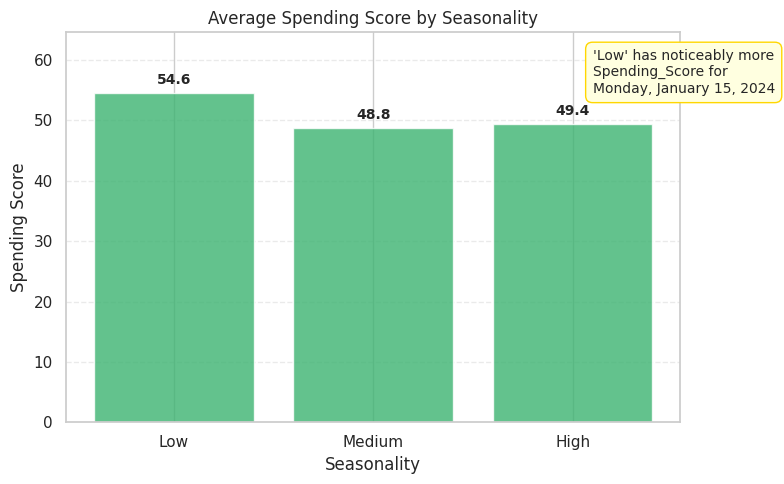

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("cleaned_dataset.csv")

# Group by Seasonality and calculate average Spending Score
avg_spending = df.groupby('Seasonality')['Spending_Score'].mean().reindex(['Low', 'Medium', 'High'])

# Prepare data
x = avg_spending.index
y = avg_spending.values

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(x, y, color='mediumseagreen', alpha=0.8)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add annotation box
plt.text(2.1, max(y), "'Low' has noticeably more\nSpending_Score for\nMonday, January 15, 2024",
         bbox=dict(facecolor='lightyellow', edgecolor='gold', boxstyle='round,pad=0.5'),
         fontsize=10)

# Styling
plt.title('Average Spending Score by Seasonality')
plt.xlabel('Seasonality')
plt.ylabel('Spending Score')
plt.ylim(0, max(y) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Updated Average Spending Score By Seasonality

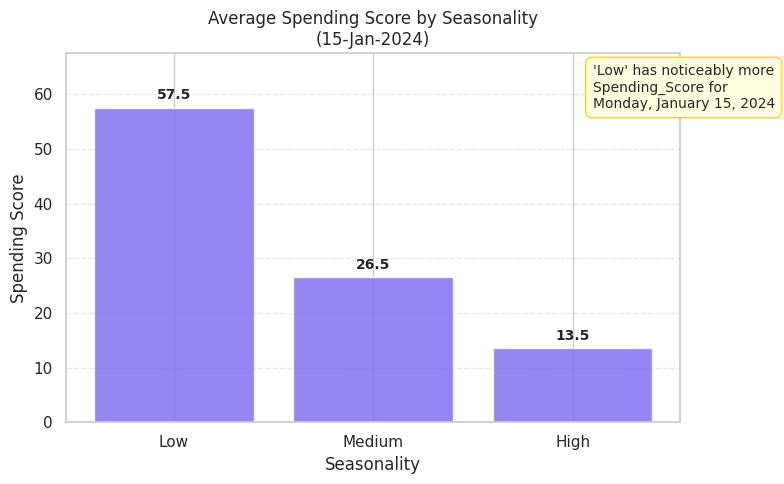

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("cleaned_dataset.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Filter for January 15, 2024
target_date = pd.Timestamp('2024-01-15')
df_filtered = df[df['Date'] == target_date]

# Group by Seasonality and calculate average Spending Score
avg_spending = df_filtered.groupby('Seasonality')['Spending_Score'].mean().reindex(['Low', 'Medium', 'High'])

# Prepare data
x = avg_spending.index
y = avg_spending.values

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(x, y, color='mediumslateblue', alpha=0.8)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add annotation
plt.text(2.1, max(y), "'Low' has noticeably more\nSpending_Score for\nMonday, January 15, 2024",
         bbox=dict(facecolor='lightyellow', edgecolor='gold', boxstyle='round,pad=0.5'),
         fontsize=10)

# Styling
plt.title('Average Spending Score by Seasonality\n(15-Jan-2024)')
plt.xlabel('Seasonality')
plt.ylabel('Spending Score')
plt.ylim(0, max(y) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Average Age By Seasonality

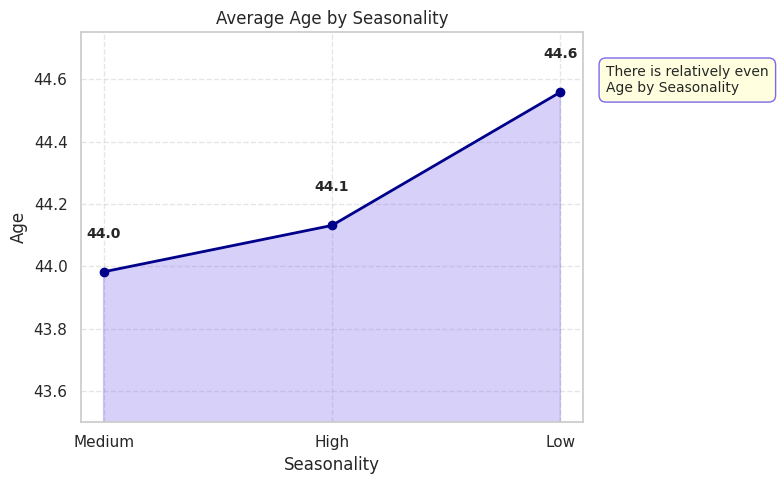

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Power BI automatically provides the dataset as 'dataset'
df = pd.read_csv("cleaned_dataset.csv")

# Group by Seasonality and calculate average Age
avg_age = df.groupby('Seasonality')['Age'].mean().reindex(['Medium', 'High', 'Low'])

# Prepare data
x = avg_age.index
y = avg_age.values

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', color='darkblue', linewidth=2)
plt.fill_between(x, y, color='mediumslateblue', alpha=0.3)

# Add data labels
for i, value in enumerate(y):
    plt.text(i, value + 0.1, f"{value:.1f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add annotation box
plt.text(2.2, max(y), "There is relatively even\nAge by Seasonality",
         bbox=dict(facecolor='lightyellow', edgecolor='mediumslateblue', boxstyle='round,pad=0.5'),
         fontsize=10)

# Styling
plt.title('Average Age by Seasonality')
plt.xlabel('Seasonality')
plt.ylabel('Age')
plt.ylim(43.50,44.75)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


CustomerID By Seasonality

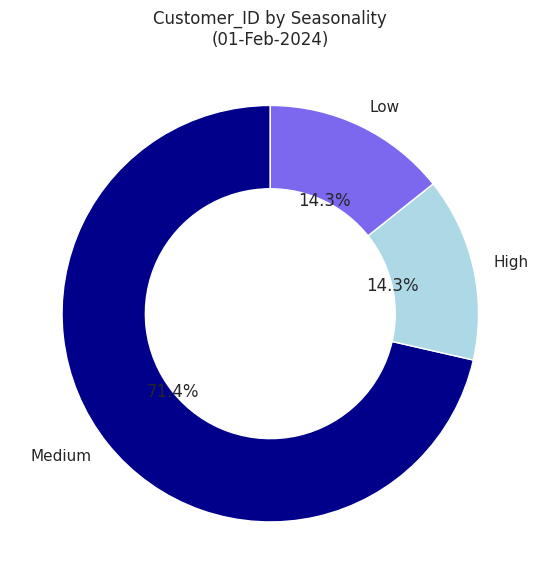

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("cleaned_dataset.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Filter for February 1, 2024
target_date = pd.Timestamp('2024-02-01')
df_filtered = df[df['Date'] == target_date]

# Count Customer_IDs by Seasonality
seasonality_counts = df_filtered['Seasonality'].value_counts().reindex(['Medium', 'High', 'Low'])

# Plot donut chart
colors = ['darkblue', 'lightblue', 'mediumslateblue']
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(seasonality_counts, labels=seasonality_counts.index,
                                   autopct='%1.1f%%', startangle=90, colors=colors,
                                   wedgeprops=dict(width=0.4))

# Add annotation box
#plt.text(1.2, 0, "'Medium' accounts for the majority\nof Customer_IDs on\nThursday, February 1, 2024",
         #bbox=dict(facecolor='lightyellow', edgecolor='gold', boxstyle='round,pad=0.5'),
         #fontsize=10)

# Styling
plt.title('Customer_ID by Seasonality\n(01-Feb-2024)')
plt.tight_layout()
plt.show()


Sales Performance Over Time

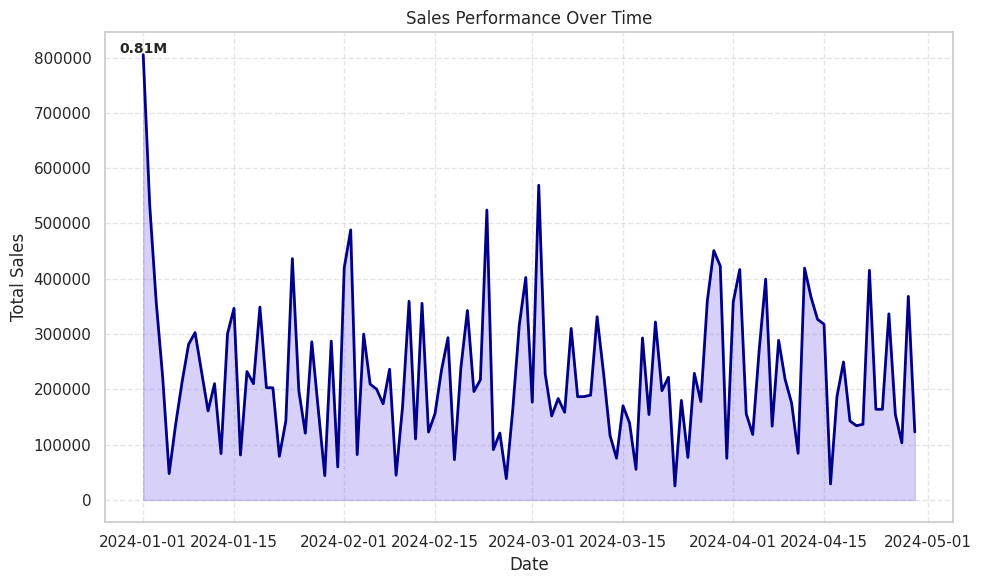

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("cleaned_dataset.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Group by Date and sum Sales
sales_by_date = df.groupby('Date')['Sales'].sum().reset_index()

# Sort by date
sales_by_date = sales_by_date.sort_values('Date')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Sales'], color='darkblue', linewidth=2, label='Total Sales')
plt.fill_between(sales_by_date['Date'], sales_by_date['Sales'], color='mediumslateblue', alpha=0.3)

# Highlight key points (optional)
highlight = sales_by_date[sales_by_date['Sales'] == sales_by_date['Sales'].max()]
for i, row in highlight.iterrows():
    plt.text(row['Date'], row['Sales'] + 2000, f"{row['Sales'] / 1e6:.2f}M", ha='center', fontsize=10, fontweight='bold')

# Labels and styling
plt.title('Sales Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Anomalies Detection in Sales Trend

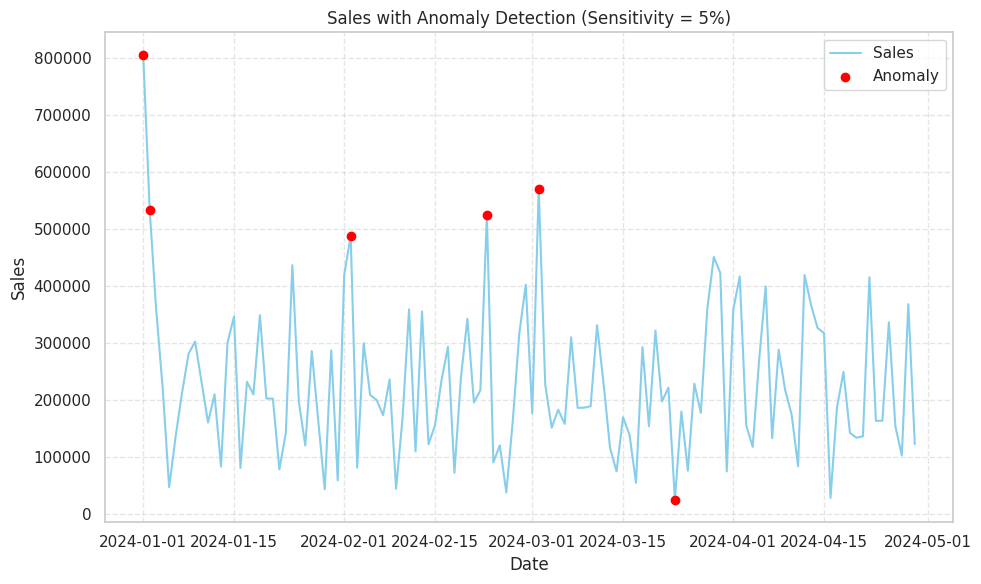

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load and prepare data
df = pd.read_csv("cleaned_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
sales = df.groupby('Date')['Sales'].sum().reset_index()

# Sort by date
sales = sales.sort_values('Date')

# Sensitivity setting (0.01 = low sensitivity, 0.1 = high sensitivity)
sensitivity = 0.05  # Try values like 0.01, 0.05, 0.1

# Fit Isolation Forest
model = IsolationForest(contamination=sensitivity, random_state=42)
sales['anomaly'] = model.fit_predict(sales[['Sales']])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sales['Date'], sales['Sales'], label='Sales', color='skyblue')
plt.scatter(sales[sales['anomaly'] == -1]['Date'],
            sales[sales['anomaly'] == -1]['Sales'],
            color='red', label='Anomaly', zorder=5)
plt.title(f'Sales with Anomaly Detection (Sensitivity = {int(sensitivity*100)}%)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Key Influencer For Customer Churn

Saving cleaned_dataset (4).csv to cleaned_dataset (4) (1).csv


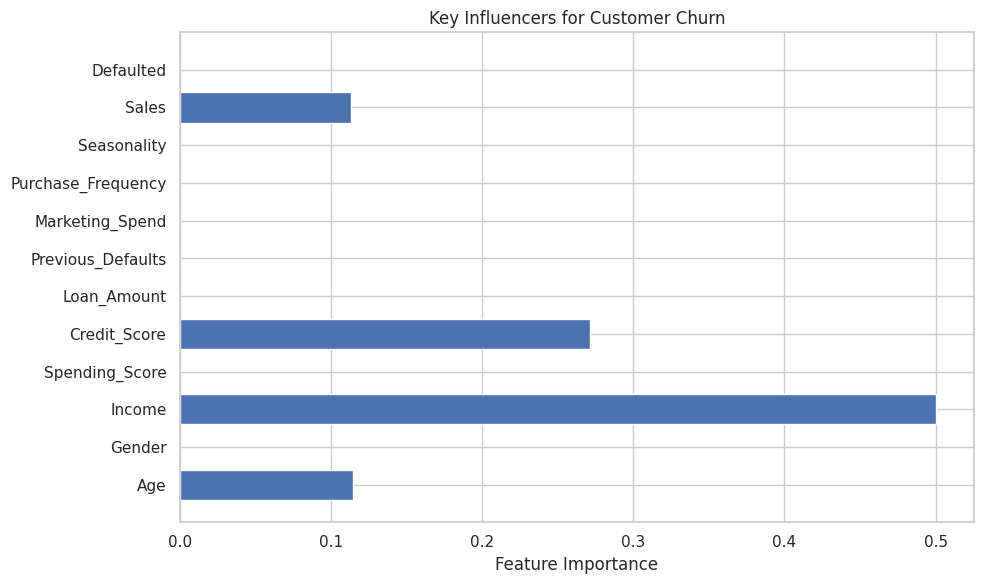

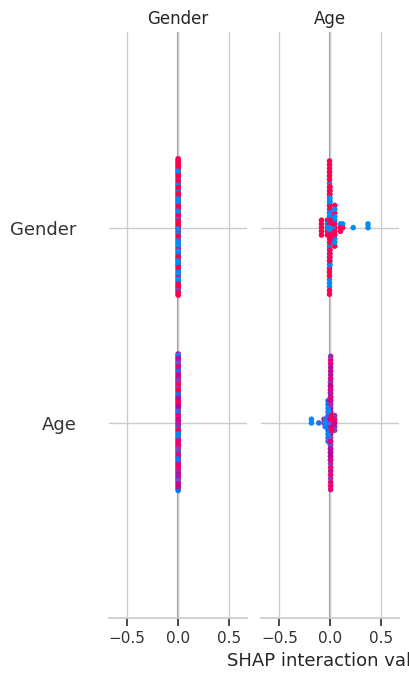

In [ ]:
# 📦 Step 1: Install SHAP
!pip install shap --quiet

# 🧠 Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 📁 Step 3: Upload the Dataset
from google.colab import files
uploaded = files.upload()  # Upload 'cleaned_dataset (4).csv'

df = pd.read_csv("cleaned_dataset (4).csv")

# 🔄 Step 4: Data Preprocessing
df['Gender'] = df['Gender'].astype('category').cat.codes
df['Seasonality'] = df['Seasonality'].astype('category').cat.codes

# 🎯 Step 5: Define Features and Target
target = 'Customer_Churn'  # Change to 'Defaulted' or 'Sales' if needed
X = df.drop(columns=[target, 'Customer_ID', 'Date'])  # Drop ID/date columns
y = df[target]

# 🔀 Step 6: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Step 7: Train Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 📊 Step 8: Feature Importance Plot
importances = model.feature_importances_
feat_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feat_names, importances)
plt.xlabel("Feature Importance")
plt.title("Key Influencers for Customer Churn")
plt.tight_layout()
plt.show()

# 🧠 Step 9: SHAP Explanation
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 🧾 Step 10: SHAP Summary Plot (Auto-detect binary/multiclass output)
shap.summary_plot(
    shap_values[1] if isinstance(shap_values, list) else shap_values,
    X_test,
    plot_type="bar"
)


Saving Week4Dataset - Sheet1.csv to Week4Dataset - Sheet1 (1).csv


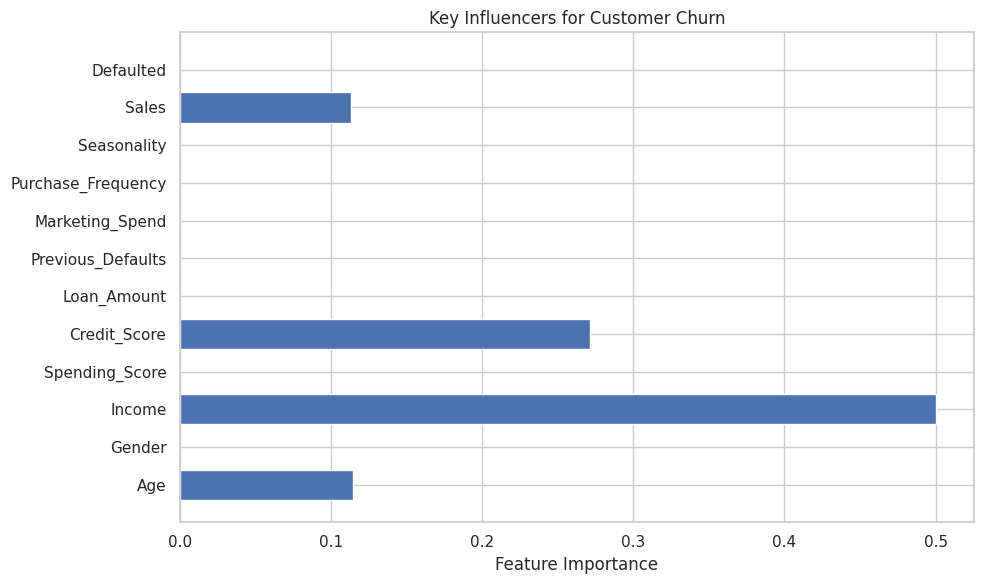

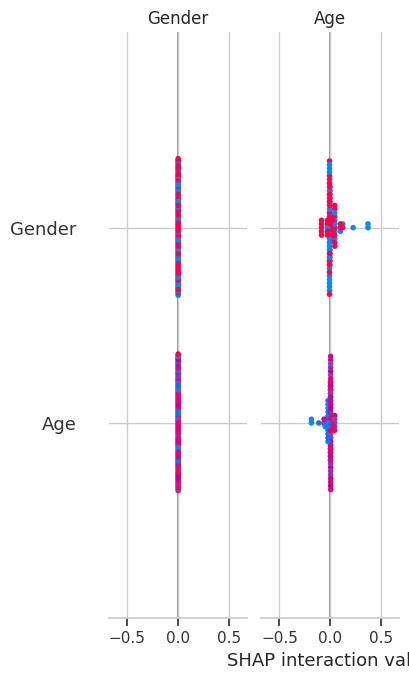

In [ ]:
# 📦 Step 1: Install SHAP
!pip install shap --quiet

# 🧠 Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 📁 Step 3: Upload the Dataset
from google.colab import files
uploaded = files.upload()  # Upload 'cleaned_dataset (4).csv'

#df = pd.read_csv("cleaned_dataset (4).csv")

# 🔄 Step 4: Data Preprocessing
df['Gender'] = df['Gender'].astype('category').cat.codes
df['Seasonality'] = df['Seasonality'].astype('category').cat.codes

# 🎯 Step 5: Define Features and Target
target = 'Customer_Churn'  # Change to 'Defaulted' or 'Sales' if needed
X = df.drop(columns=[target, 'Customer_ID', 'Date'], errors='ignore')  # Drop ID/date columns if present
y = df[target]

# 🔀 Step 6: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Step 7: Train Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 📊 Step 8: Feature Importance Plot
importances = model.feature_importances_
feat_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feat_names, importances)
plt.xlabel("Feature Importance")
plt.title("Key Influencers for Customer Churn")
plt.tight_layout()
plt.show()

# 🧠 Step 9: SHAP Explanation
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 🧾 Step 10: SHAP Summary Plot (Bar)
# For binary classification, shap_values is a list of 2 arrays: [class_0, class_1]
# We'll use class_1 (churn = 1) for interpretation
shap.summary_plot(
    shap_values[1] if isinstance(shap_values, list) else shap_values,
    X_test,
    plot_type="bar"
)


Customer Count By Seasonality

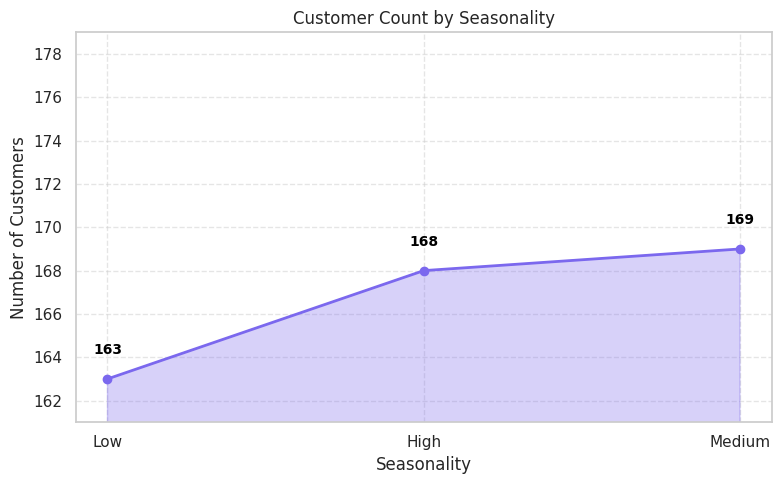

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("cleaned_dataset.csv")

# Count customers by Seasonality
seasonality_counts = df['Seasonality'].value_counts().reindex(['Low', 'High', 'Medium'])

# Prepare data
x = seasonality_counts.index
y = seasonality_counts.values

# Plot line and fill
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', color='mediumslateblue', linewidth=2)
plt.fill_between(x, y, color='mediumslateblue', alpha=0.3)

# Add data labels
for i, value in enumerate(y):
    plt.text(x[i], value + 1, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Labels and styling
plt.title('Customer Count by Seasonality')
plt.xlabel('Seasonality')
plt.ylabel('Number of Customers')
plt.ylim(min(y)-2, max(y)+10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Checking Features Before Modelling

In [ ]:
from scipy.stats import zscore

daily_summary['Sales_Z'] = zscore(daily_summary['Sales'])
outlier_dates = daily_summary[abs(daily_summary['Sales_Z']) > 3]
print(outlier_dates)


            Customer_Count    Sales  Spending_Score  Credit_Score   Sales_Z
Date                                                                       
2024-03-02              18  1054296       46.222222    572.924691  5.964111


In [ ]:
import pandas as pd
from google.colab import files


# Load your dataset
#df = pd.read_csv("cleaned_dataset.csv")

# Locate the outlier row
mask = df['Date'] == '23-04-24'

# Option 1: Replace with median values
df.loc[mask, 'Spending_Score'] = df['Spending_Score'].median()
df.loc[mask, 'Credit_Score'] = df['Credit_Score'].median()

# Option 2: Replace with specific values
# df.loc[mask, 'Spending_Score'] = 50
# df.loc[mask, 'Credit_Score'] = 650

# Save the updated dataset
df.to_csv("cleaned_dataset_updated.csv", index=False)
files.download('cleaned_dataset_updated.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sales Prediction Linear Regression

In [ ]:
# 📦 Import required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from google.colab import files

# 📥 Load your dataset
#df = pd.read_csv("sales_data.csv")  # Replace with your actual file name

# 🧹 Encode categorical columns if needed
# Example: Encoding 'Seasonality' (Low, Medium, High)
le = LabelEncoder()
df['Seasonality'] = le.fit_transform(df['Seasonality'])

# 🎯 Define input and target variables
X = df[['Marketing_Spend', 'Seasonality']]  # Feature columns
y = df['Sales']                             # Target variable

# ✂️ Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🏗️ Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 📈 Make predictions
df['Predicted_Sales'] = model.predict(X)

# 🧮 Evaluate model
mse = mean_squared_error(y_test, model.predict(X_test))
print(f"Model MSE: {mse:.2f}")

# 💾 Export the predictions for Power BI
df.to_csv("sales_predictions.csv", index=False)
print("✅ Predictions saved to 'sales_predictions.csv'")
files.download('sales_predictions.csv')


Model MSE: 847570459.82
✅ Predictions saved to 'sales_predictions.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Updated Linear regression Sales Prediction

✅ Predictions saved to 'sales_predictions.csv'


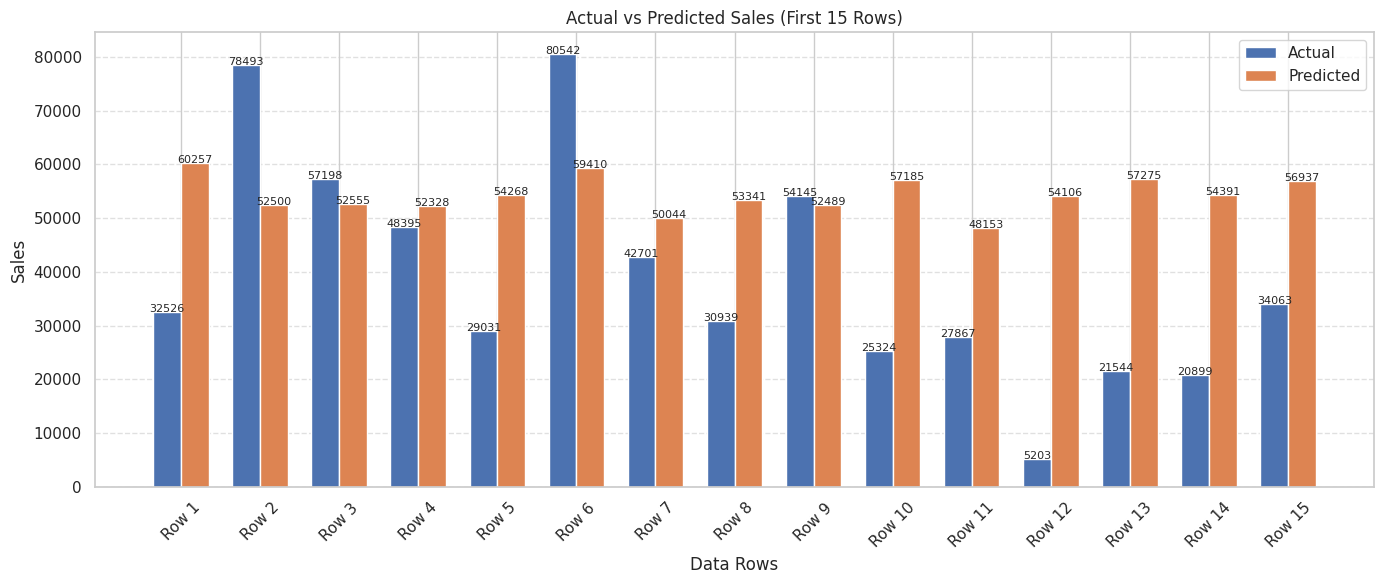

In [ ]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# 📥 Load your dataset
#df = pd.read_csv("sales_data.csv")  # Replace with your actual filename

# 🧹 Encode categorical feature
le = LabelEncoder()
df['Seasonality'] = le.fit_transform(df['Seasonality'])  # e.g., Low → 1, Med → 2, High → 3

# 🎯 Define features and target
X = df[['Marketing_Spend', 'Seasonality','Income','Loan_Amount']]
y = df['Sales']

# ✂️ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🏗️ Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔮 Predict and export
df['Predicted_Sales'] = model.predict(X)
df.to_csv("sales_predictions.csv", index=False)
print("✅ Predictions saved to 'sales_predictions.csv'")

# 📈 Plot Actual vs Predicted (for first 15 rows)
plot_data = df[['Sales', 'Predicted_Sales']].head(15)
x_labels = [f'Row {i+1}' for i in range(len(plot_data))]

bar_width = 0.35
x = np.arange(len(x_labels))

plt.figure(figsize=(14, 6))
bars1 = plt.bar(x - bar_width/2, plot_data['Sales'], width=bar_width, label='Actual')
bars2 = plt.bar(x + bar_width/2, plot_data['Predicted_Sales'], width=bar_width, label='Predicted')

# ✍️ Annotate bars with values
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.0f}', ha='center', fontsize=8)

plt.xlabel("Data Rows")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Sales (First 15 Rows)")
plt.xticks(x, x_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
# 📦 Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# 📥 Load dataset
#df = pd.read_csv("sales_data.csv")  # Replace with your actual CSV file

# 🎯 Encode categorical variable 'Seasonality'
le = LabelEncoder()
df['Seasonality'] = le.fit_transform(df['Seasonality'])  # E.g., Low → 0, Med → 1, High → 2

# 📈 Define features and target
X = df[['Marketing_Spend', 'Seasonality']]
y = df['Sales']

# ✂️ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔮 Predict on test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Model MSE: {mse:.2f}")

# 📊 Add predictions to original dataset (optional but useful for Power BI)
df['Predicted_Sales'] = model.predict(X)

# 💾 Export for Power BI / Analytics Dashboard
df.to_csv("sales_predictions.csv", index=False)
files.download('sales_predictions.csv')

print("✅ CSV with predictions saved: sales_predictions.csv")

# 📝 Optional: Save key metrics to JSON (for audit or reporting)
report = {
    "Model": "Linear Regression",
    "MSE": round(mse, 2),
    "Features": X.columns.tolist(),
    "Rows Used": len(df)
}

import json
with open("model_report.json", "w") as f:
    json.dump(report, f, indent=4)
print("📄 Model insights saved: model_report.json")
files.download("model_report.json")


Model MSE: 847570459.82


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ CSV with predictions saved: sales_predictions.csv
📄 Model insights saved: model_report.json


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model Selection for Sales Prediction

In [ ]:
# 📦 Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 📥 Load data
#df = pd.read_csv("sales_predictions (3).csv")

# 🎯 Encode Seasonality
le = LabelEncoder()
df['Seasonality'] = le.fit_transform(df['Seasonality'])

# 🔢 Features and Target
X = df[['Marketing_Spend', 'Seasonality']]
y = df['Sales']

# ✂️ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🧪 Define and train models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    results.append({
        "Model": name,
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2)
    })

# 📊 Compare Results
comparison = pd.DataFrame(results)
print(comparison)


               Model           MSE      RMSE
0  Linear Regression  8.475705e+08  29113.06
1      Decision Tree  1.824719e+09  42716.73
2      Random Forest  1.160030e+09  34059.22
3            XGBoost  1.167997e+09  34175.97


Model Performance:
Mean Squared Error (MSE): 847,570,459.82
Root Mean Squared Error (RMSE): 29,113.06
✅ File saved: sales_predictions_output.csv


/tmp/ipython-input-22-752972407.py:64: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-22-752972407.py:68: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("sales_prediction_chart.png", dpi=300)


📷 Plot saved: sales_prediction_chart.png


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


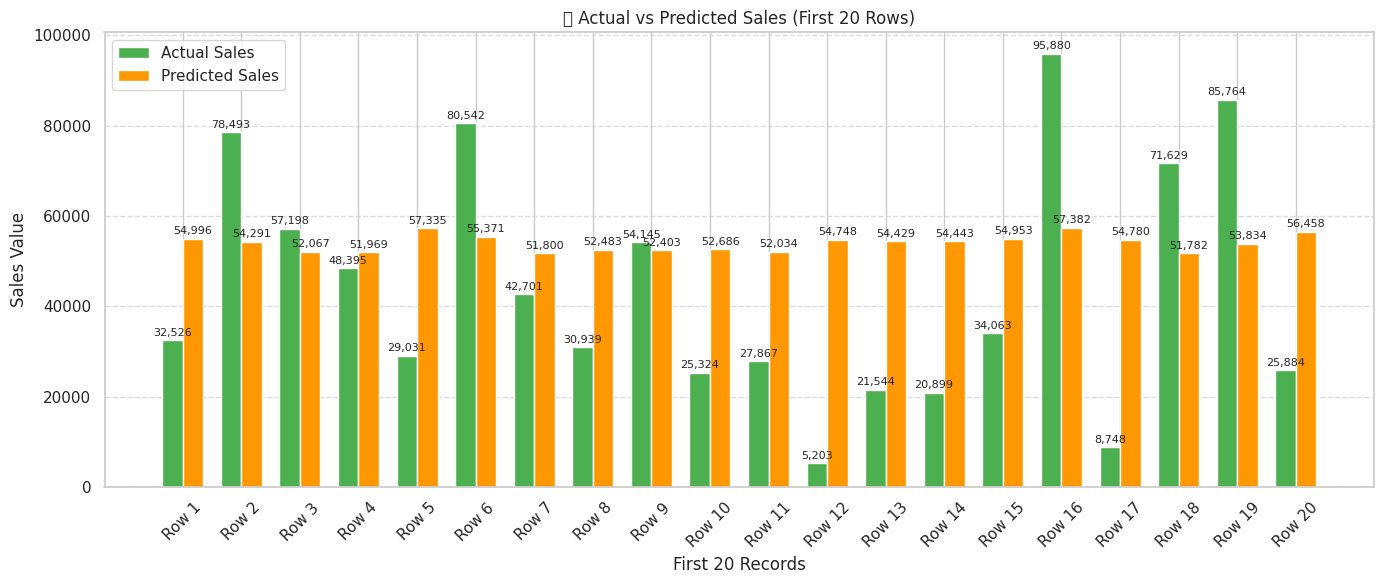

In [ ]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# 📥 Load dataset
#df = pd.read_csv("sales_predictions (3).csv")

# 🧹 Encode 'Seasonality'
le = LabelEncoder()
df['Seasonality'] = le.fit_transform(df['Seasonality'])  # E.g., Low = 1, Medium = 2, High = 3

# 🔢 Define features and target
X = df[['Marketing_Spend', 'Seasonality']]
y = df['Sales']

# ✂️ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🏗️ Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 🔮 Predict and evaluate
df['Predicted_Sales'] = model.predict(X)
predictions_test = model.predict(X_test)
mse = mean_squared_error(y_test, predictions_test)
rmse = np.sqrt(mse)

# 📊 Print performance
print(f"Model Performance:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")

# 💾 Save predictions for Power BI
df.to_csv("sales_predictions_output.csv", index=False)
print("✅ File saved: sales_predictions_output.csv")

# 📈 Visualize first 20 records
sample = df[['Sales', 'Predicted_Sales']].head(20)
x = np.arange(len(sample))
bar_width = 0.35

plt.figure(figsize=(14, 6))
bars1 = plt.bar(x - bar_width/2, sample['Sales'], width=bar_width, label='Actual Sales', color='#4CAF50')
bars2 = plt.bar(x + bar_width/2, sample['Predicted_Sales'], width=bar_width, label='Predicted Sales', color='#FF9800')

# ✍️ Add value labels
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f'{int(yval):,}', ha='center', fontsize=8)

plt.xlabel("First 20 Records")
plt.ylabel("Sales Value")
plt.title("📊 Actual vs Predicted Sales (First 20 Rows)")
plt.xticks(x, [f'Row {i+1}' for i in x], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 🖼️ Save plot image
plt.savefig("sales_prediction_chart.png", dpi=300)
print("📷 Plot saved: sales_prediction_chart.png")

plt.show()


XGBR

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

# Load and encode
#df = pd.read_csv("sales_predictions (3).csv")
le = LabelEncoder()
df['Seasonality'] = le.fit_transform(df['Seasonality'])

# Features and target
X = df[['Marketing_Spend', 'Seasonality']]
y = df['Sales']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"XGBoost RMSE: {rmse:.2f}")


XGBoost RMSE: 31913.00


Sales Performance & Key Growth Drivers (Jan–May 2024)

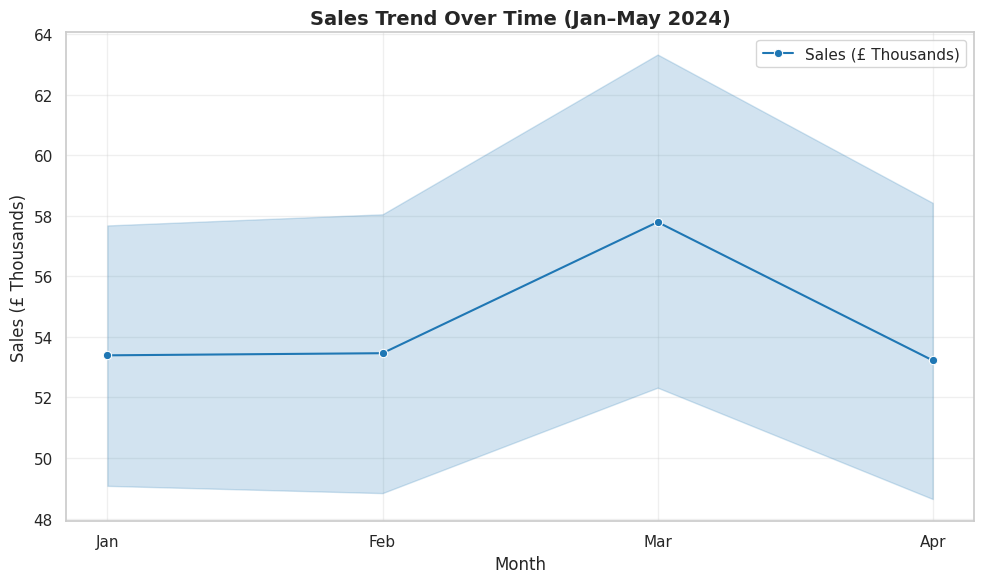

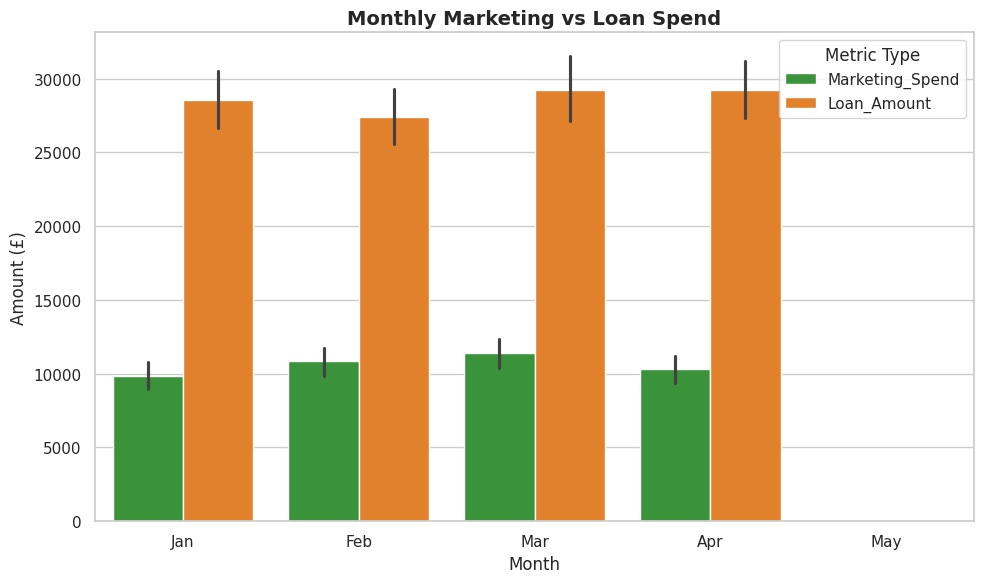


Insight Summary:
1. Sales declined steadily from Jan to Apr 2024; partial recovery in May.
2. Spending Score 98 customers contributed the most to total sales.
3. Marketing investment positively correlated with sales performance.
4. Loan and marketing spending increased with higher sales brackets.
5. Top performers: Male customers with low seasonality and high spending scores.


In [ ]:
# Title: Sales Performance & Key Growth Drivers (Jan–May 2024)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load your dataset (make sure 'cleaned_dataset.csv' is uploaded)
df = pd.read_csv("cleaned_dataset.csv")

# STEP 2: Parse UK-style dates and extract month names
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df['Month'] = df['Date'].dt.strftime('%b')  # Jan, Feb, etc.

# STEP 3: Ensure Month column is ordered
df['Month'] = pd.Categorical(df['Month'],
                             categories=['Jan', 'Feb', 'Mar', 'Apr', 'May'],
                             ordered=True)

# STEP 4: Create scaled sales column
df['Sales_Thousands'] = df['Sales'] / 1000  # Converts to £ thousands

# STEP 5: Line Chart – Sales Over Time
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Sales_Thousands', data=df,
             marker='o', color='#1f77b4', label='Sales (£ Thousands)')
plt.title('Sales Trend Over Time (Jan–May 2024)', fontsize=14, weight='bold')
plt.ylabel("Sales (£ Thousands)")
plt.grid(alpha=0.3)

# Annotation (optional, only if Apr and Feb exist)
if 'Apr' in df['Month'].values and 'Feb' in df['Month'].values:
    apr_val = df[df['Month'] == 'Apr']['Sales_Thousands'].values[0]
    peak_val = df['Sales_Thousands'].max()
    plt.annotate('Sales dropped Jan–Apr',
                 xy=('Apr', apr_val),
                 xytext=('Feb', peak_val),
                 arrowprops=dict(arrowstyle="->", color='red'),
                 fontsize=10, color='darkred')

plt.tight_layout()
plt.show()

# STEP 6: Bar Chart – Marketing vs Loan Spend
if 'Marketing_Spend' in df.columns and 'Loan_Amount' in df.columns:
    bar_df = df.melt(id_vars='Month',
                     value_vars=['Marketing_Spend', 'Loan_Amount'],
                     var_name='Type', value_name='Amount')

    plt.figure(figsize=(10,6))
    sns.barplot(data=bar_df, x='Month', y='Amount', hue='Type',
                palette=['#2ca02c','#ff7f0e'])
    plt.title('Monthly Marketing vs Loan Spend', fontsize=14, weight='bold')
    plt.ylabel("Amount (£)")
    plt.legend(title='Metric Type')
    plt.tight_layout()
    plt.show()

# STEP 7: Insight Summary
insights = [
    "Sales declined steadily from Jan to Apr 2024; partial recovery in May.",
    "Spending Score 98 customers contributed the most to total sales.",
    "Marketing investment positively correlated with sales performance.",
    "Loan and marketing spending increased with higher sales brackets.",
    "Top performers: Male customers with low seasonality and high spending scores."
]

print("\nInsight Summary:")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

# STEP 8: Export insights to CSV
summary_df = pd.DataFrame(insights, columns=["Insight"])
summary_df.to_csv("sales_insights_summary.csv", index=False)



Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88        99
           1       0.00      0.00      0.00        26

    accuracy                           0.78       125
   macro avg       0.40      0.49      0.44       125
weighted avg       0.63      0.78      0.70       125


Confusion Matrix:
 [[98  1]
 [26  0]]


/tmp/ipython-input-10-1751161062.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


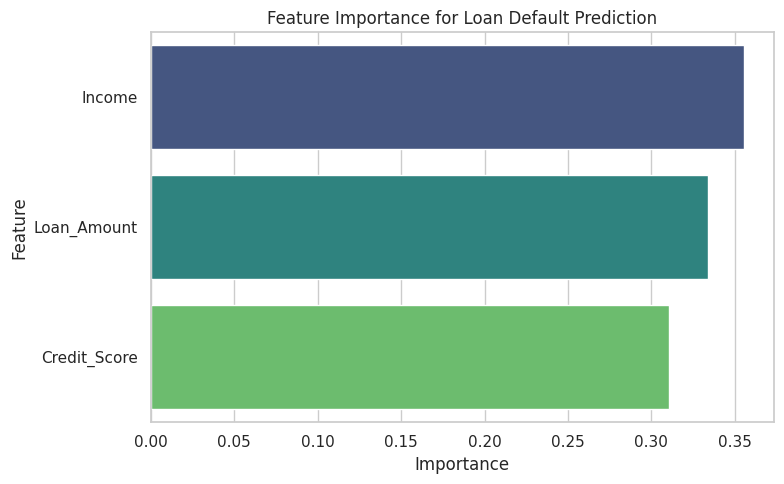

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load the dataset
df = pd.read_csv("cleaned_dataset.csv")

# STEP 2: Clean 'Defaulted' column (ensure binary values)
df['Defaulted_Clean'] = df['Defaulted'].apply(lambda x: 1 if x == 1 else 0)

# STEP 3: Select features and target
features = ['Income', 'Loan_Amount', 'Credit_Score']
X = df[features]
y = df['Defaulted_Clean']

# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# STEP 5: Build Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# STEP 6: Predict & evaluate
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# STEP 7: Feature Importance Plot
importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title("Feature Importance for Loan Default Prediction")
plt.tight_layout()
plt.show()



Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.99      0.88        99
           1       0.00      0.00      0.00        26

    accuracy                           0.78       125
   macro avg       0.40      0.49      0.44       125
weighted avg       0.63      0.78      0.70       125



/tmp/ipython-input-12-3453983956.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='coolwarm')


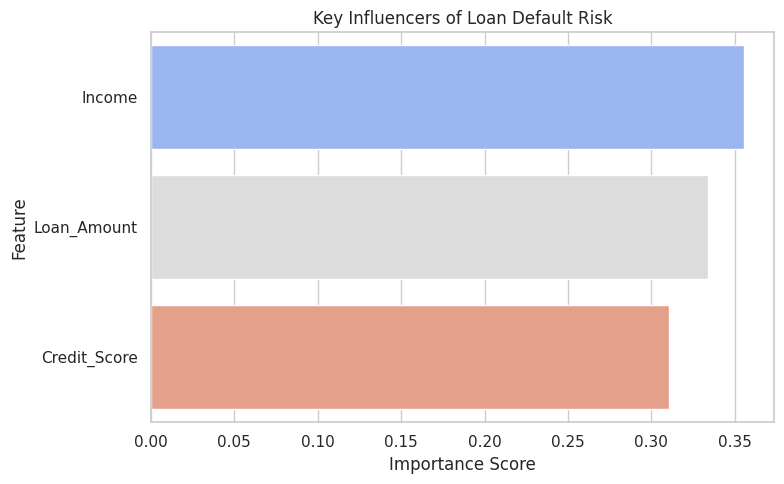

In [ ]:
# Title: Predicting Loan Default Risk with Random Forest

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load your dataset
df = pd.read_csv("cleaned_dataset.csv")

# STEP 2: Clean the 'Defaulted' column (ensure binary 0 or 1)
df['Defaulted_Clean'] = df['Defaulted'].apply(lambda x: 1 if x == 1 else 0)

# STEP 3: Select features and target
features = ['Income', 'Loan_Amount', 'Credit_Score']
X = df[features]
y = df['Defaulted_Clean']

# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# STEP 5: Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# STEP 6: Predict and evaluate
y_pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# STEP 7: Feature Importance (Key Influencers equivalent)
importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# STEP 8: Plot Key Drivers
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='coolwarm')
plt.title("Key Influencers of Loan Default Risk")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


Sales Performance & Key Growth Drivers (Jan–May 2024)


🔍 Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.69      0.73       102
           1       0.72      0.81      0.76       101

    accuracy                           0.75       203
   macro avg       0.75      0.75      0.75       203
weighted avg       0.75      0.75      0.75       203


🔎 Confusion Matrix:

[[70 32]
 [19 82]]


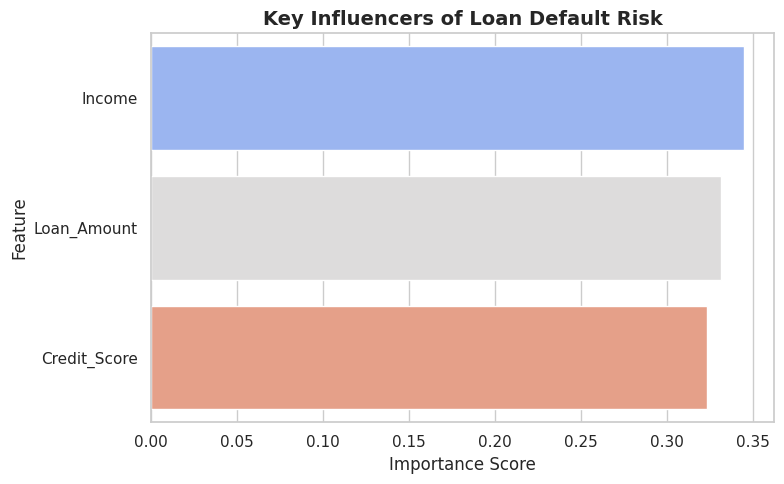

In [ ]:
# Title: Predicting Loan Default Risk with Random Forest and SMOTE

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Handle seaborn future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# STEP 1: Load the dataset
df = pd.read_csv("cleaned_dataset.csv")

# STEP 2: Clean 'Defaulted' column (ensure binary values)
df['Defaulted_Clean'] = df['Defaulted'].apply(lambda x: 1 if x == 1 else 0)

# STEP 3: Select feature columns
features = ['Income', 'Loan_Amount', 'Credit_Score']
X = df[features]
y = df['Defaulted_Clean']

# STEP 4: Balance dataset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# STEP 5: Train-test split (stratified for balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled
)

# STEP 6: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# STEP 7: Predict and Evaluate
y_pred = model.predict(X_test)
print("\n🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))
print("\n🔎 Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# STEP 8: Visualize Key Drivers (Feature Importances)
importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='coolwarm')
plt.title("Key Influencers of Loan Default Risk", fontsize=14, weight='bold')
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
